## Домашнее задание № 1 (Макс. 10 баллов)

В данной домашней работе мы познакомимся на практике с пройденными в рамках 2 и 3 лекции темами, включающими в себя статистику, проверку гипотез и A/B тестирование.

#### Здесь добавлю импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm

import pandas as pd
import seaborn as sns

from ambrosia.designer import Designer, design_binary

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

from IPython.display import Image, display

C:\Users\smirn\ambrosia-env\lib\site-packages\ambrosia\tools\import_tools.py:22: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


### Для блока, посвященному A/B тестированию, помимо базового решения, продемонстрирую Open-Source библиотеку для проведения A/B тестирования `Ambrosia`.

Ниже указан ряд ссылок, по которым можно ознакомиться с функционалом библиотеки более подробно.

- [Ambrosia на GitHub: репозиторий, примеры реализации](https://github.com/MobileTeleSystems/Ambrosia)
- [Статья Аслана Байрамкулова и Артема Хакимова из Big Data МТС на Хабре про Ambrosia](https://habr.com/ru/companies/ru_mts/articles/700992/)
- [Официальная документация Ambrosia](https://ambrosia.readthedocs.io/en/latest/)
- [ODS Reliable ML AB Testing & Causal Inference Meetup. Аслан Байрамкулов | Ambrosia - open-source библиотека для быстрой и удобной работы с A/B тестами](https://youtu.be/W8u-4zt1RSM?si=syqpM_6fUTbSvSp9)
- [Семинар: Артём Хакимов – Ambrosia, open source-библиотека для A/B тестов и экспериментов](https://www.youtube.com/watch?v=nFIeouvE2gk&ab_channel=NoML)

#### О бинарных метриках в `Ambrosia` при дизайне эксперимента (класс `Designer`)

Для бинарных данных мы можем использовать либо метод "theory", либо метод "binary".

- Метод **"theory"** выполняет численный расчёт параметров, используя различные аппроксимации.  
- Метод **"binary"** осуществляет оценку параметров на основе многократной генерации выбранного доверительного интервала.  
  Некоторые из этих интервалов являются достаточно экзотичными и требуют отдельного изучения для осознанного применения.  
  По умолчанию используется стандартный интервал Вальда (Wald interval). 

### Задача 1 (2 балла)

**(1 Балл)** Рассчитайте среднее, стандартное отклонение и медиану по 1000 случайных выборок, порождённых нормальным распределением с $\mu = 5$ и $\sigma^2 = 4$, состоящих из 100 элементов. Постройте распределение полученных метрик.

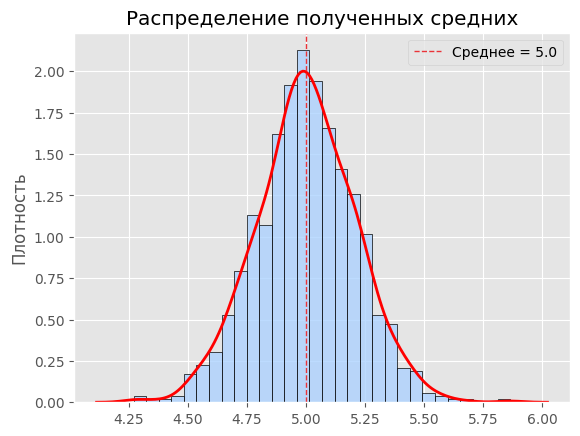

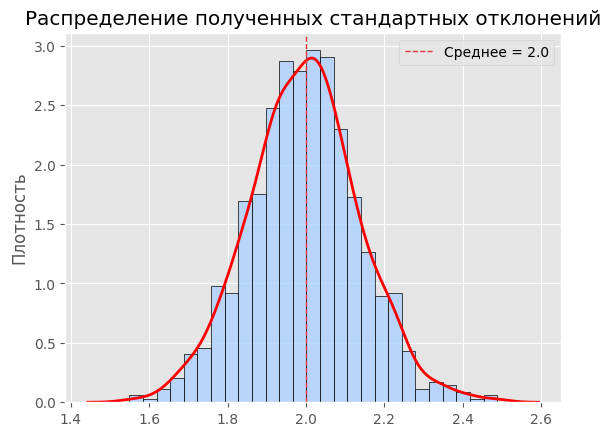

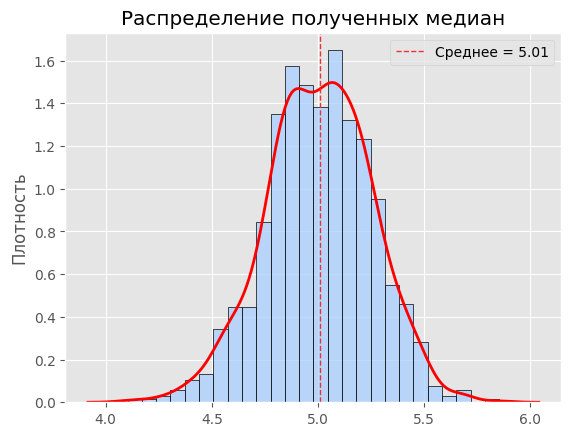

In [6]:
# Я несколько изменил исходные аргументы функции для удобства (выполняю все то же задание, ограничений на изменение предоставленного кода не было)

# ВАЖНО! #1. В аргументах функции sigma ошибочно указана как 4 (в задании требуется параметр sigma^2 = 4, т. е. sigma = 2). 
# Скорректировал!

# ВАЖНО #2. Не указано, оценивать sigma смещенную или с корректировкой на 1 степень свободы. 
# Оценил с корректировкой, при желании можно легко поменять в коде!
# В лекции корректировка БЫЛА!

# Замечание #1. При необходимости для оптимизации можно свести все к массивам numpy, а не работать со списками. Мне просто было удобнее сделать так.

np.random.seed(42)


def calc_stat_random_sample(mu=5, sigma=2, size=100):
    ... # Место для вашего кода
    random_sample = np.random.normal(loc=mu, scale=sigma, size=size)
    
    mean = random_sample.mean()
    std = random_sample.std(ddof=1)
    median = np.median(random_sample)
    
    return(mean, std, median)

... # Место для вашего кода

n_samples = 1000

means = []
stds = []
medians = []

for _ in range(n_samples):
    mean, std, median = calc_stat_random_sample(mu=5, sigma=2, size=100)
    means.append(mean)
    stds.append(std)
    medians.append(median)

means_arr = np.array(means)
stds_arr = np.array(stds)
medians_arr = np.array(medians)


sns.histplot(means_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
sns.kdeplot(means_arr, color="red", linewidth=2)
means_arr_mean = round(means_arr.mean(),2)
plt.axvline(means_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {means_arr_mean}")
plt.ylabel('Плотность')
plt.title("Распределение полученных средних")
plt.legend()
plt.show()


sns.histplot(stds_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
sns.kdeplot(stds_arr, color="red", linewidth=2)
stds_arr_mean = round(stds_arr.mean(),2)
plt.axvline(stds_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {stds_arr_mean}")
plt.ylabel('Плотность')
plt.title("Распределение полученных стандартных отклонений")
plt.legend()
plt.show()


sns.histplot(medians_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
sns.kdeplot(medians_arr, color="red", linewidth=2)
medians_arr_mean = round(medians_arr.mean(),2)
plt.axvline(medians_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {medians_arr_mean}")
plt.ylabel('Плотность')
plt.title("Распределение полученных медиан")
plt.legend()
plt.show()

#### Альтернативный вариант написания функции (оставил в ноутбуке на всякий случай, это первый вариант написания функции)

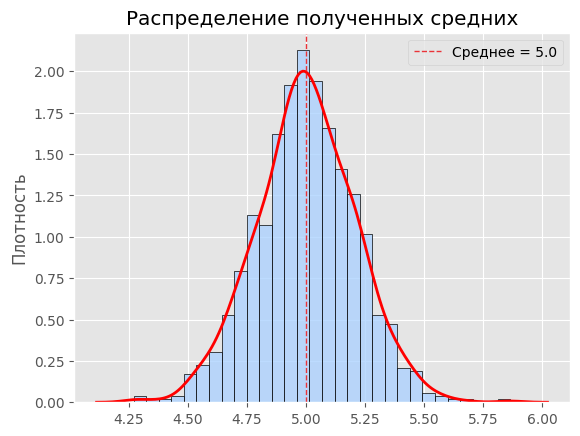

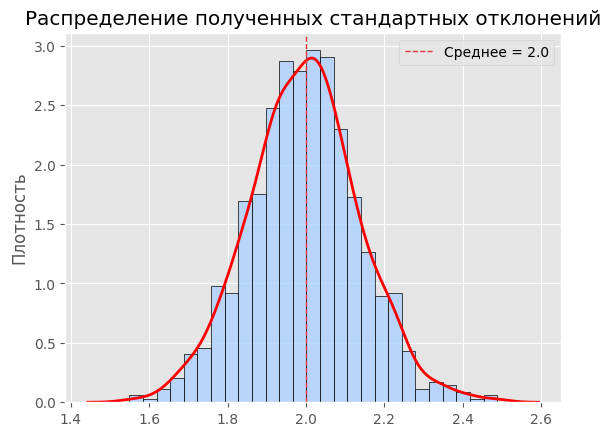

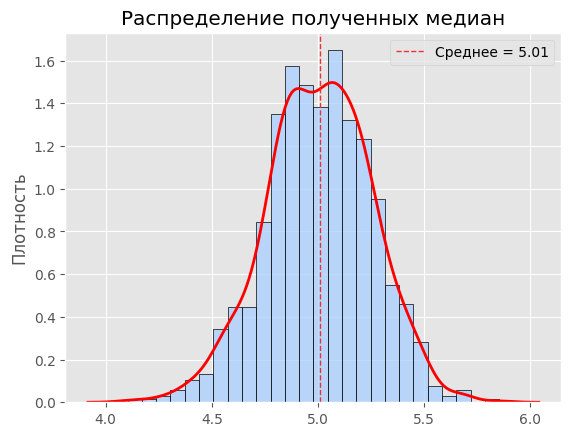

In [8]:
np.random.seed(42)

def calc_stat_random_sample_alternative(mu, sigma, size, n_samples):
    ... # Место для вашего кода
    means_list = []
    std_list = []
    median_list = []
    
    for _ in range(n_samples):
        
        random_sample = np.random.normal(loc=mu, scale=sigma, size=size)
        
        mean_random_sample = random_sample.mean()
        std_random_sample = random_sample.std(ddof=1)
        median_random_sample = np.median(random_sample)

        means_list.append(mean_random_sample)
        std_list.append(std_random_sample)
        median_list.append(median_random_sample)
        
    means_arr = np.array(means_list)
    std_arr = np.array(std_list)
    median_arr = np.array(median_list)

    sns.histplot(means_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
    sns.kdeplot(means_arr, color="red", linewidth=2)
    means_arr_mean = round(means_arr.mean(),2)
    plt.axvline(means_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {means_arr_mean}")
    plt.ylabel('Плотность')
    plt.title("Распределение полученных средних")
    plt.legend()
    plt.show()


    sns.histplot(std_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
    sns.kdeplot(std_arr, color="red", linewidth=2)
    std_arr_mean = round(std_arr.mean(),2)
    plt.axvline(std_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {std_arr_mean}")
    plt.ylabel('Плотность')
    plt.title("Распределение полученных стандартных отклонений")
    plt.legend()
    plt.show()


    sns.histplot(median_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
    sns.kdeplot(median_arr, color="red", linewidth=2)
    median_arr_mean = round(median_arr.mean(),2)
    plt.axvline(median_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {median_arr_mean}")
    plt.ylabel('Плотность')
    plt.title("Распределение полученных медиан")
    plt.legend()
    plt.show()
    
    return(means_list, std_list, median_list)

stats_random_sample = calc_stat_random_sample_alternative(mu=5, sigma=2, size=100, n_samples=1000)

**(1 Балл)** Какому распределению принадлежит распределение средних? Почему?

### **Ответ**

**Распределение средних будет принадлежать нормальному распределению $\mathcal{N}(\mu, \dfrac{\sigma^2}{n})$ по Центральной предельной теореме (ЦПТ).**

Ниже приведу хорошую справку касаемо данной теоремы.

**Центральная предельная теорема (ЦПТ):**

Пусть $X_1, X_2, \ldots, X_n$ — независимые и одинаково распределённые случайные величины с математическим ожиданием $\mathbb{E}[X_i]=\mu$ и конечной дисперсией $\mathrm{Var}(X_i)=\sigma^2<\infty$.

Тогда при $n \to \infty$ среднее:
$$
\bar{X}_n = \frac{X_1 + X_2 + \ldots + X_n}{n}
$$
стремится по распределению к нормальному распределению $\mathcal{N}(\mu, \dfrac{\sigma^2}{n})$, то есть:
$$
\bar{X} \xrightarrow{d} \mathcal{N}(\mu, \dfrac{\sigma^2}{n}),\quad \text{при } n \to \infty.$$
> Означает сходимость по распределению (convergence in distribution).
> Сходимость по распределению ≠ сходимость по вероятности, но из сходимости по вероятности следует сходимость по распределению.

Тогда при $n \to \infty$ нормированное среднее:
$$
Z_n = \dfrac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}
$$
стремится по распределению к стандартному нормальному распределению $\mathcal{N}(0, 1)$, то есть:
$$
\frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}} \xrightarrow{d} \mathcal{N}(0, 1),\quad \text{при } n \to \infty.
$$

### **Вывод:** 

Среднее независимых и одинаково распределённых случайных величин с математическим ожиданием $\mathbb{E}[X_i]=\mu$ и конечной дисперсией $\mathrm{Var}(X_i)=\sigma^2<\infty$ будет стремится к нормальному, даже если исходные случайные величины не принадлежат нормальному распределению; то есть, случайные величины могут принадлежать абсолютно произвольному распределению.

В нашем же случае исходная случайная величина сэмплируется из нормального распределения, а линейная комбинация н. р. с. в. - н. р. с. в., так что все еще проще.

### Задача 2 (2 балла):

Оцените значение $\hat{\mu}$ параметра $\mu$ **(1 балл)** для нормального распределения $\mathscr{N}(\mu,1)$ используя метод максимального правдоподобия.

Справка: функция плотности распределения для нормального распределения имеет вид:
$$
    f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \text{e}^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$

**1) Функция правдоподобия:**

$$l(\mu \mid x) = \prod_{i=1}^{n} P\!\left(\mathbf{x}_{i} \mid \mu\right)$$

*(т.к. $\sigma^2$ известна, рассм. только в отн-ии к параметру $\mu$)*

$$l(\mu \mid x) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i-\mu)^2}{2\sigma^2}}$$

$$l(\mu \mid x) = \left(\frac{1}{\sqrt{2\pi}}\right)^n \prod_{i=1}^n e^{-\frac{(x_i-\mu)^2}{2}} \quad (T.\kappa. \ \sigma^2 = 1)$$

**2) Логарифм ф-ции правдоподобия:**

$$\ln(l(\mu \mid x)) = \ln\left(\left(\frac{1}{\sqrt{2\pi}}\right)^n \prod_{i=1}^n e^{-\frac{(x_i-\mu)^2}{2}}\right)$$

*(Черновик на полях: $(x_i-\mu)^2 = x_i^2 + \mu^2 - 2x_i\mu \Rightarrow -\frac{1}{2}x_i^2 - \frac{1}{2}\mu^2 + x_i\mu$)*

$$= \sum_{i=1}^n \ln \frac{1}{\sqrt{2\pi}} + \sum_{i=1}^n \ln\left(e^{-\frac{(x_i-\mu)^2}{2}}\right)$$

**3) Дифференцируем по параметру $\mu$:**

$$\frac{\partial \ln l}{\partial \mu} = \sum_{i=1}^n \frac{1}{e^{-\frac{(x_i-\mu)^2}{2}}} \cdot e^{-\frac{(x_i-\mu)^2}{2}} \cdot (x_i - \mu) = \sum_{i=1}^n (x_i - \mu) =$$

$$= \sum_{i=1}^n x_i - n\mu$$

**4) F.O.C.:**

$$\frac{\partial \ln l}{\partial \mu} = 0 \Rightarrow \sum_{i=1}^n x_i - n\mu = 0 \Rightarrow \mu^* = \frac{1}{n} \sum_{i=1}^n x_i = \bar{X}$$

**S.O.C.:**
$$\frac{\partial^2 \ln l}{\partial \mu^2} = -n < 0 \Rightarrow \text{это максимум}$$

**Ответ:** $\hat{\mu} = \mu^* = \bar{X}$ (MLE - оценка пар-ра $\hat{\mu} = \bar{X}$)

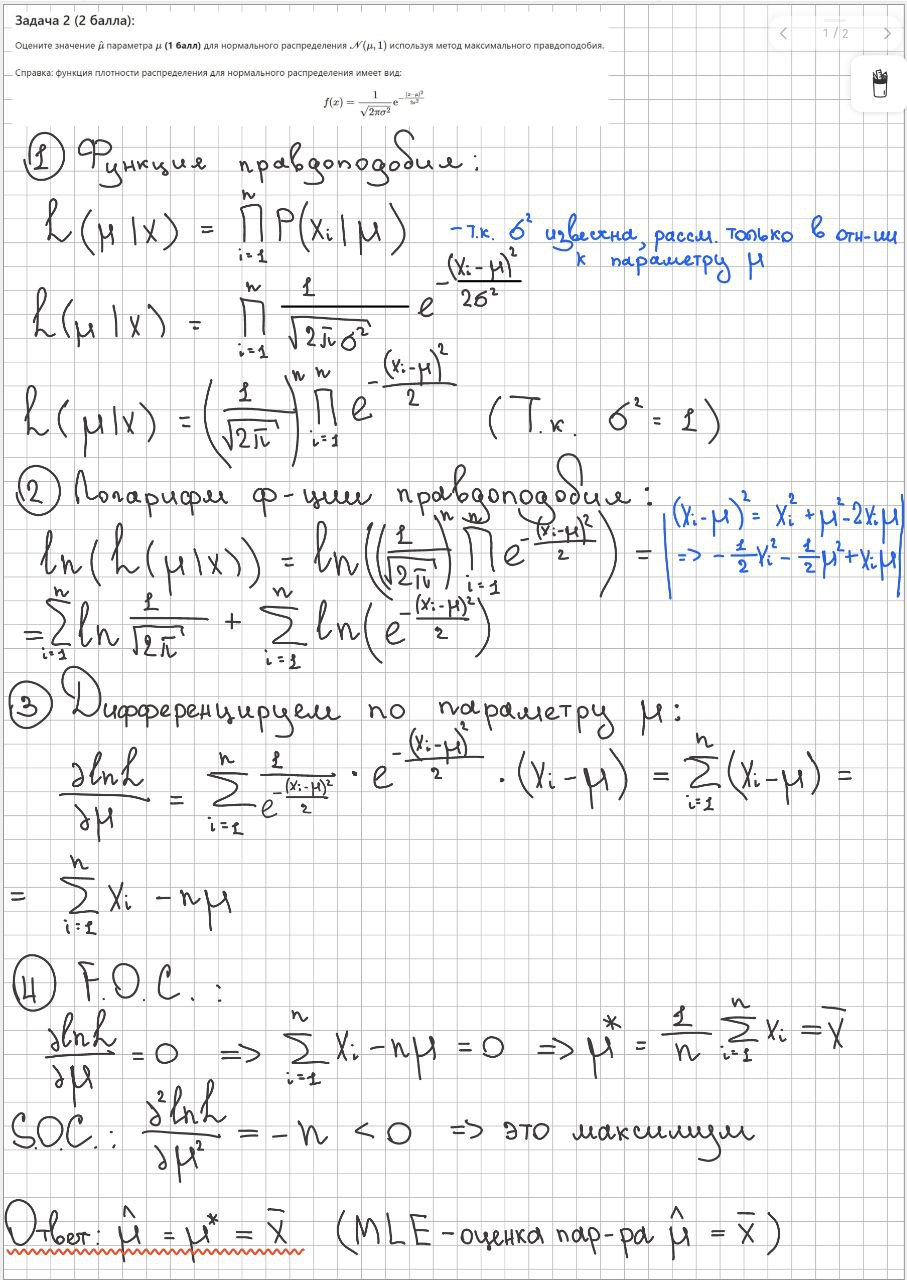

In [15]:
display(Image(filename="solution_picture.jpg"))

Сгенерируйте 1000 выборок размером 1000 наблюдений из нормального распределения с $\mu = 5, \sigma^2 = 1$, постройте распределение разности $\mu - \hat{\mu}$ и найдите среднее этой разности в зависимости от числа выборок **(1 балл)**.

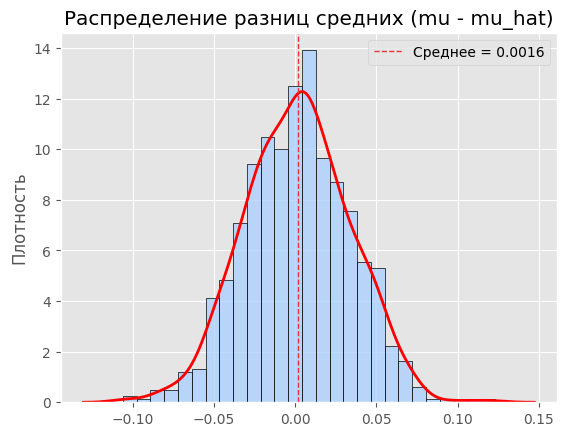

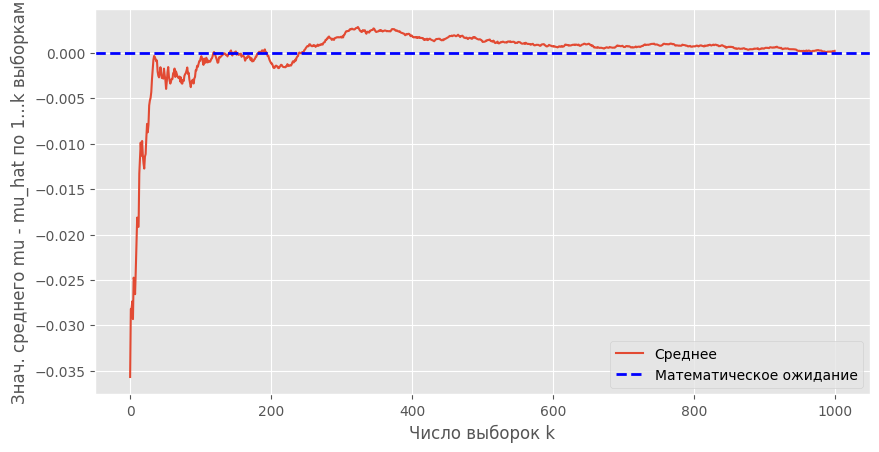

In [17]:
# Место для вашего кода и картинок

np.random.seed(42)

def norm_dist_diff(mu, sigma, size, n_samples):

    mus_diff_list = []
    
    for _ in range(n_samples):
        
        random_sample = np.random.normal(loc=mu, scale=sigma, size=size)
        mu_hat = random_sample.mean()
        mu_diff = mu - mu_hat
        mus_diff_list.append(mu_diff)        
       
    mus_diff_arr = np.array(mus_diff_list)


    sns.histplot(mus_diff_arr, kde=False, stat="density", color='#ADD2FF', edgecolor="black", alpha=0.8)
    sns.kdeplot(mus_diff_arr, color="red", linewidth=2)
    mus_diff_arr_mean = round(mus_diff_arr.mean(),4)
    plt.axvline(mus_diff_arr_mean, color='#EA3338', linewidth=1, linestyle='--', label=f"Среднее = {mus_diff_arr_mean}")
    plt.ylabel('Плотность')
    plt.title("Распределение разниц средних (mu - mu_hat)")
    plt.legend()
    plt.show()
    
    return mus_diff_list

def norm_dist_diff_by_n_sample(mu, sigma, size, n_samples):

    mus_diff_list = []
    
    for _ in range(n_samples):
        
        random_sample = np.random.normal(loc=mu, scale=sigma, size=size)
        mu_hat = random_sample.mean()
        mu_diff = mu - mu_hat
        mus_diff_list.append(mu_diff)   
        
    mus_arr = np.array(mus_diff_list)

    mus_cumsum_mean = np.cumsum(mus_arr) / np.arange(1, n_samples + 1)
    
    plt.figure(figsize=(10,5))
    plt.plot(mus_cumsum_mean)
    # 0 - это мат. ожидание
    plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
    plt.xlabel('Число выборок k')
    plt.ylabel('Знач. среднего mu - mu_hat по 1...k выборкам')
    plt.legend(['Среднее', 'Математическое ожидание']) 
    
    return None


mus_diffs_random_sample = norm_dist_diff(mu=5, sigma=1, size=1000, n_samples=1000)

norm_dist_diff_by_n_sample(mu=5, sigma=1, size=1000, n_samples=1000)

### Задача 3 (2 балла)

**(1 балл)** Пусть известно, что выборка в n наблюдений порождена распределением Бернулли ~Bernoulli(p), пусть среднее значение по выборке равно $\hat{p}$. Постройте формулу 95% доверительного интервал для среднего

*Решение:* По ЦПТ среднее будет распределено нормально, дисперсия случайной величины будет $\hat{p} \cdot (1 - \hat{p})$ следовательно можем просто накатить формулку:
$$ \hat{p} \pm 1.96 \sqrt{\frac{\hat{p} \cdot (1 - \hat{p})}{n}}$$

**(1 балл)** Постройте 95% доверительный интервал на среднее в представленной выборке, используя бутстрап и сравните с теоретическим значением

In [22]:
X = sps.bernoulli.rvs(0.2, size = 10000, random_state=42)

#### Асимптотический доверительный интервал для среднего значения на базе ЦПТ

Напишу полноценное решение, без готовой формулы (которая уже была в ноутбуке)

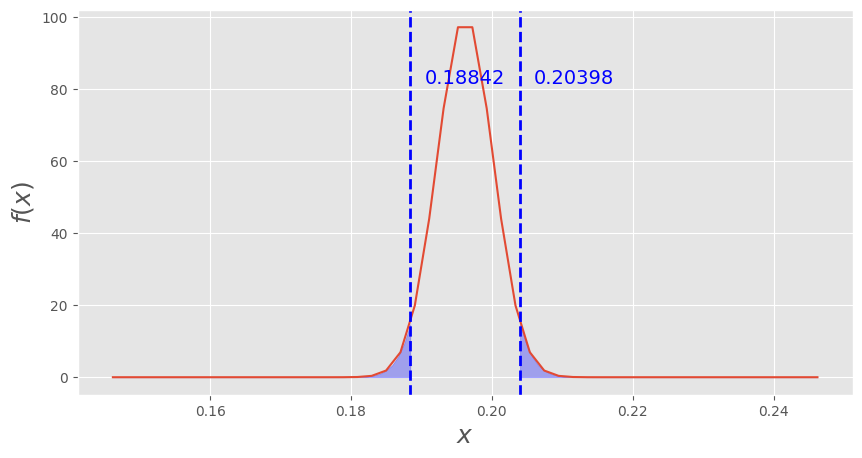

Доверительный интервал для выборки X:
(0.18841617059195953, 0.2039838294080405)


In [24]:
n = len(X)

def norm_conf_int(alpha, mean_hat, std_hat, n, margin=0.05):

    se = std_hat / np.sqrt(n)

    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat - margin, mean_hat + margin)
    pdf = sps.norm(mean_hat, se).pdf(xs)

    plt.plot(xs, pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.xlabel('$x$', fontsize=18)

    left, right = sps.norm.interval(1 - alpha, loc=mean_hat, scale=se)

    for i in [left, right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color="blue", linestyle='dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)

        text_margin = 0.002
        plt.text(i + text_margin, 0.8*y_max, round(i, 5), color="blue", fontsize=14)
        yq = sps.norm(mean_hat, se).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)

    plt.show()
    return left, right

alpha = 0.05
mu_hat = X.mean()
sd_hat = X.std(ddof=1)
n = len(X)

ci_asy = norm_conf_int(alpha, mu_hat, sd_hat, n=n, margin=0.05)
print(f"Доверительный интервал для выборки X:\n{ci_asy}")

#### Эфронов доверительный интервал (бутстрап)
##### Делаю предположение, что используем обычный бутстрап с возвращением.

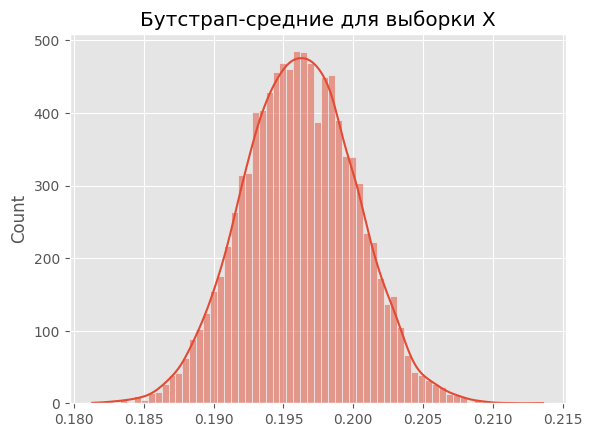

95% доверительный интервал для small sample: [0.1884 0.2038]


In [26]:
# Запустим бутстрап
size = 10000
n_iters = 10000

def bootstrap_mean(X):
    means_list = []
    for _ in range(n_iters):
        bs_sample = np.random.choice(X, size=len(X), replace=True)
        means_list.append(bs_sample.mean())
    return means_list

x_means = bootstrap_mean(X)
sns.histplot(x_means, kde=True)
plt.title("Бутстрап-средние для выборки X")
plt.show()

# Доверительный интервал для выборки X
ci = np.percentile(x_means, q=[2.5, 97.5]).round(20)
print(f"95% доверительный интервал для small sample: {ci}")

#### Вывод-сравнение: доверительные интервалы относительно схожи между собой.

### Задача 4 (4 балла)

Основным критерием для тестирования гипотезы о равенстве средних является t-test. Он строится на том, что по ЦПТ практически для любой случайной величины средние будут распределены нормально. 

В учебниках по статистике доказывается, что в силу этого для двух выборок, порождённых одинаково распределёнными независимыми случайными величинами с равным средним мы имеем асимпототику для выборочной t-статистики
$$
    T = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s_x^2}{n_1} + \frac{s_y^2}{n_2}}} \rightarrow t_{n_1 + n_2 - 2},
$$
где $\bar{x}, \bar{y}$ -- выборочные средние в выборках, $s_x^2, s_y^2$ -- выборочные дисперсии, $n_1, n_2$ -- размеры выборок, а $t_{n_1 + n_2 - 2}$ -- распределение Стьюдента с $n_1 + n_2 - 2$ степенями свободы.

**(1 балл)** Постройте плотность распределения Стьюдента с 1, 5, 10, 100 и 1000 степеней свободы, а также плотность стандартного нормального распределения

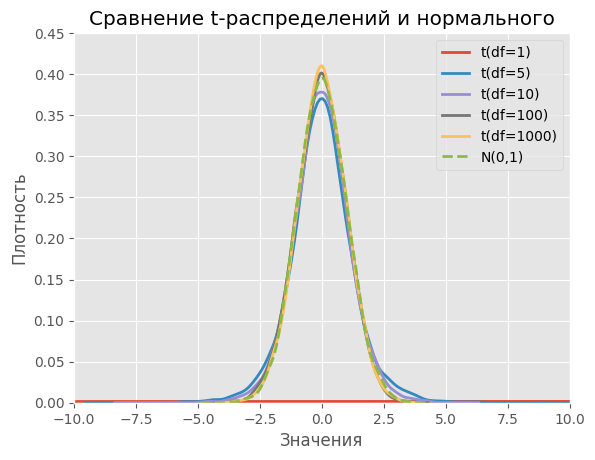

In [30]:
grid = np.arange(-10,10,0.01)

freedom_degrees = [1,5,10,100,1000]

# Место для вашего кода и картинок
size = 10000

for df in freedom_degrees:
    sample = np.random.standard_t(df, size=size)
    sns.kdeplot(sample, linewidth=2, label=f"t(df={df})")

# нормальное
normal_sample = np.random.normal(0, 1, size=size)
sns.kdeplot(normal_sample, linewidth=2, linestyle="--", label="N(0,1)")

plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.title("Сравнение t-распределений и нормального")
plt.legend()
plt.xlim(-10, 10)
plt.ylim(0, 0.45)
plt.show()

**(1 балл)** Пусть нам необходимо запустить A/B тест: в первой группе мы оставляем кнопку в банковском приложении в сером цвете, во втором -- красим её в жёлтый. Всего у нас в месяц в приложение заходит 1000 различных клиентов. Базовая конверсия в нажатие кнопки сейчас составляет 0.2. Бизнес постановил, что MDE = 5%, то есть значимым будет считаться изменение, при котором конверсия будет больше 0.21 или меньше 0.19. Хватит ли нам данных, чтобы замерить эффект за один месяц при уровне значимости $\alpha = 0.05$, если мы планируем поделить выборку пополам на тест и контроль?

Для начала предоставлю справку.

**Формула расчета размера выборки (двувыборочный случай)**
$$\large
N = \frac{2\sigma^2 (Z_{\alpha/2} + Z_{\beta})^2}{\text{effect}^2}
$$

Ошибка 1-го рода:
$$\large
P\left( \left| \bar{Y} - \bar{X} \right| \geq \varepsilon \mid \mu_y - \mu_x = 0 \right) = \alpha = 0.05
$$
Ошибка 2-го рода:
$$\large
P\left( \bar{Y} - \bar{X} < \varepsilon \mid \mu_y = \mu_x (1 + \delta) \right) = \beta
$$

Но так как размер ошибки 2-го рода не зафиксирован, попробую другой подход.

**Дано**

Базовая конверсия:  
$p_0 = 0.20$

MDE = 5%

$\Rightarrow$ - абсолютная разница: $\Delta = 0.01$

Всего пользователей:

$N = 1000$

Делим 50/50:

$n_1 = n_2 = 500$

Уровень значимости:  

$\alpha = 0.05 \Rightarrow z_{0.975} = 1.96$

1. **Стандартная ошибка разности долей**
$$
SE
= \sqrt{
\frac{p_0(1-p_0)}{n_1}
+
\frac{(p_0+\Delta)(1-p_0-\Delta)}{n_2}
}.
$$
Подставим значения:
$$
SE
\approx
\sqrt{
\frac{0.2 \cdot 0.8}{500}
+
\frac{0.21 \cdot 0.79}{500}
}
=
\sqrt{0.0006518}
\approx 0.0255.
$$

2. **Какой $z$ получится при истинном эффекте MDE?**

$$
z_{\text{eff}} = \frac{\Delta}{SE}
= \frac{0.01}{0.0255}
\approx 0.39.
$$


3. **Сравнение с критическим значением**

Для статистической значимости требуется:

$$
|z| \ge 1.96.
$$

Но фактически имеем:

$$
0.39 \ll 1.96.
$$

**Вывод:**

Даже если истинный эффект равен MDE, наблюдаемая статистика в среднем **не сможет достичь порога значимости**.

**Следовательно, 1000 пользователей в месяц недостаточно**, чтобы обнаружить эффект $\text{MDE} = 5\%$ при уровне значимости $\alpha = 0.05$.

In [33]:
# Место для вашего кода

# НАПИСАЛ В ТЕХЕ РЕШЕНИЕ ВЫШЕ, А КОД НИЖЕ!

#### А теперь с помощью функционала библиотеки Ambrosia. Справка:

For binary data, we can use either the "theory" method or the "binary" method.

The "theory" method performs a numerical calculation of the parameters using various approximations.
The approximation method choice is controlled by the stabilizing_method parameter and defaults to "asin" which is more accurate and robust. You can find more information about the approximations on the Net.

The "binary" approach does parameter estimation based on the multiple construction of chosen confidence interval. Some of these intervals are quite exotic and should be studied for conscious application. As a default a standard Wald interval is used.
This approach is more slowly and it's accuracy depends on the number of iterations.

Now let's create a grid of known parameters and calculate interested ones. We will use two above methods consequntly.

Experiment design based on a known retention rate value

In some cases, complete data on a binary metric is missing or not needed.
These can be known and pre-calculated conversion/retention values, or simply the absence of any historical data (in which case, for example, assumption for rates are needed).

And now we will calculate the experimental parameters using the known retantion rate value.

#### Представим, что значение ошибки 2-го года - общепринятые в индустрии 20%.

In [35]:
retention = 0.2
# Create grid of MDEs and group sizes
# I and II type errros will have default values

effects = [1.05]
group_sizes = [500]

# Design group sizes

design_binary(to_design='size',
              prob_a=retention,
              method='theory',
              effects=effects)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Effect,
5.0%,25580


In [36]:
design_binary(to_design='size',
              prob_a=retention,
              method='binary',
              effects=effects)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Effect,
5.0%,25671


#### Вывод: для классического значения ошибки 2-го рода делаем рациональный вывод, что данных для детекции эффекта попросту недостаточно.

In [38]:
# ПРИМЕЧАНИЕ: ЕСЛИ ИНТЕРЕСНО ОЗНАКОМИТЬСЯ С ДОПОЛНИТЕЛЬНЫМ ФУНКЦИОНАЛОМ В КОНТЕКСТЕ РАСЧЕТОВ ДЛЯ БИНАРНОЙ МЕТРИКИ

# Design MDE values

design_binary(to_design='effect',
              prob_a=retention,
              method='theory',
              sizes=group_sizes)

"Errors ($\alpha$, $\beta$)",(0.05; 0.2)
Group sizes,
500,37.6%


#### Здесь можно промоделировать мощность теста

In [40]:
# Design test power
design_binary(to_design='power',
              prob_a=retention,
              method='theory',
              effects=effects,
              sizes=group_sizes)

,Group sizes,500
$\alpha$,Effect,
0.05,5.0%,6.8%


**(1 балл)** Мы провели тест и получили следующие результаты:

In [42]:
X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000, random_state=42), sps.bernoulli.rvs(0.21, size = 1000, random_state=42)

Можем ли мы утверждать на уровне значимости $\alpha = 0.05$, что эффект имел место быть?

In [44]:
# Место для вашего кода

p_1 = 199 / 1000
p_2 = 211 / 1000
p_diff = p_2 - p_1
p_hat = (p_1*1000 + p_2*1000) / (1000 + 1000)

se = (p_hat * (1 - p_hat)*(1 / 1000 + 1 / 1000))**0.5
z_stat = p_diff / se
p_value = 2 * sps.norm.sf(abs(z_stat))
print(p_value)

0.5062619031445739


#### Вывод: нет, не можем. Мы не нашли достаточно "аргументов" для того, чтобы отвергнуть гипотезу $H_0$ в пользу альтернативной гипотезы $H_1$. Статистически значимой разницы между группами по значению метрики не обнаружено.

**(1 балл)** 

Что будет, если мы проведём 1000 таких тестов, "отпустив" random_state?

В какой доле случаев мы не задетектируем это существующее различие? Чему будет равна $\beta$?

In [47]:
# Под "отпущенным" random_state понимается None
# X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.21, size = 1000)

# Место для кода

alpha = 0.05
n = 1000
p1 = 0.20
p2 = 0.21
n_tests = 1000

# p-value >= alpha
not_detected = 0
# p-value < alpha
detected = 0

for _ in range(n_tests):
    X1 = sps.bernoulli.rvs(p1, size=n)
    X2 = sps.bernoulli.rvs(p2, size=n)

    p1_hat = X1.mean()
    p2_hat = X2.mean()

    # тут по-другому перепишу, с другой нотацией (не как в предыдущем пункте)

    p_pool = (X1.sum() + X2.sum()) / (2 * n)

    se = np.sqrt(p_pool * (1 - p_pool) * (1/n + 1/n))

    z = (p2_hat - p1_hat) / se
    p_value = 2 * sps.norm.sf(abs(z))

    if p_value < alpha:
        detected += 1
    else:
        not_detected += 1

share_not_detected = not_detected / n_tests
beta_hat = share_not_detected

print(f"Доля случаев, когда мы НЕ задетектировали (p-value >= {alpha}): {share_not_detected:.4f}")
print(f"Оценка beta: {beta_hat:.4f}")
print(f"Оценка мощности (1 - beta): {(1 - beta_hat):.4f}")

Доля случаев, когда мы НЕ задетектировали (p-value >= 0.05): 0.9170
Оценка beta: 0.9170
Оценка мощности (1 - beta): 0.0830


#### Выводы: можно наблюдать в принте выше!

А если различий не будет (при проведении 1000 A/A-тестов)? Как будет распределено p-value в этом случае?

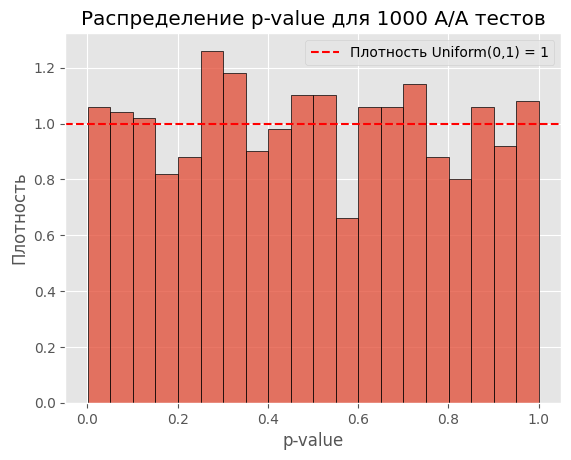

Доля p-value < 0.05: 0.052 (ожидаем около 0.05)


In [49]:
# Под A/A тестом имеем в виду: X_1, X_2 = sps.bernoulli.rvs(0.2, size = 1000), sps.bernoulli.rvs(0.2, size = 1000)

# Место для кода

alpha = 0.05
n = 1000
p = 0.2
n_tests = 1000

p_values = []

for _ in range(n_tests):
    X1 = sps.bernoulli.rvs(p, size=n)
    X2 = sps.bernoulli.rvs(p, size=n)

    p1_hat = X1.mean()
    p2_hat = X2.mean()

    p_pool = (X1.sum() + X2.sum()) / (2 * n)
    se = np.sqrt(p_pool * (1 - p_pool) * (1/n + 1/n))

    z = (p2_hat - p1_hat) / se
    p_value = 2 * sps.norm.sf(abs(z))
    p_values.append(p_value)

p_values = np.array(p_values)

sns.histplot(p_values, bins=20, stat="density", edgecolor="black")
plt.axhline(1, linestyle="--", color="red", label="Плотность Uniform(0,1) = 1")
plt.title("Распределение p-value для 1000 A/A тестов")
plt.xlabel("p-value")
plt.ylabel("Плотность")
plt.legend()
plt.show()

# Доля ложных срабатываний
false_positive_rate = (p_values < alpha).mean()
print(f"Доля p-value < {alpha}: {false_positive_rate:.3f} (ожидаем около {alpha})")

#### Выводы: ответ выше!